Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Robert Fournier"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


# Answers to Questions

(Work is shown below)

### Question 1. 

**Part 1 - Results**
_(See the chart below for the Survived correlation for each feature)_

The passengers most likely to survive the Titanic were those who were:
* married women with 'Mrs.' in their listed name (33.78% correlation to Survived),
* those with longer names (mostly associated with women as it includes their maiden names, 33.2% correlation to Survived),
* unmarried women with 'Miss.' in theur listed name (32.6% correlation to Survived),
* passengers in Class 1 (28.2% correlation to Survived),
* passengers who paid fare above median (14.45, 26.5%), passengers who paid above average for their fare (32.09, 24%) and in general those who paid more for their fare (25.2%)
* those who embarked in Cherbourg (17%)
* those who were in cabins with 'B' in the cabin number (16.7%), 'E' or 'D' in the cabin number (15.1%), or 'C' (11%). In fact, cabin numbers with F have a weak correlation (5%) and A has a very weak correlation (2%). For the most part, having a letter in the cabin number denotes a very weak to relatively strong correlation. Only cabins with the letter 'G' have a very weak negative correlation to Survived (-2%). But, having no cabin number assigned provides a disastrious correlation to Survived (-31.3%).

The category of passenger most likely to survive the Titantic were passengers with a listed name including "Mrs.", in passenger class 1, and paid a fare above median (14.45). Out of 18 passengers fitting the category, only 1 perished in the disaster. Adding in the criteria 

**Part 2 - Explanation**

The analysis focused on building strong features to explain the data through feature discovery and cleaning. Each original feature was analyzed to determine whether it required cleaning (null values or unuseable data) and whether it could be mined for new synthetic features.

This took place in the following order (which viewable in the code contained below).

* **Data Importation and Initial Discovery** - during this phase the data was imported and initial discovery on the columns was completed. 
* **Data Cleaning and Imputation** - during this phase, the dataset was cleaned to remove some null values while other features with nulls were either imputated with relevant values, or created new binary features indicating whether it was null or not.
* **Feature Engineering** - with the dataset cleaned, attention was focused on how to properly indicate certain features, including turning several into binary features and bucketing other features into binary features for quick and certain correlation.
* **Data Analysis and Correlation** - in this phase, the dataset is run through Pandas correlation method and a visual analysis is performed on some key metrics of survival. 

It should be noted here that there is a lot of redundancy and correlation between the variables and features used. This was achieved on purpose with 29 columns for initial exploration and a wide analysis.

**Please see the work below for detailed commentary during these processes to this question.**

### Question 2.

**Part 1 - What features were used?**

This shallow analysis was performed on a generally wide set of features for the titanic dataframe. Including binary buckets of existing features, there were a **total of 31 columns** in the final version of the dataset run for correlation. 

Here are some key decisions made on features:
* **Embarked** - turned into 3 binary bucket features depending on whether the passenger embarked in C = Cherbourg, Q = Queenstown, S = Southampton
* **Name** - was the source of a number of new features engineered. It was used to mine for salutations (Mr., Mrs., Miss.) as well as draw details on name length. In the end, these features mostly were further analysis into the gender - where there was a very high correlation between female salutions and female sex, as well as the Mrs. salutation and the length of a name. While it was ultimately highly correlated to gender, it was valuable to attempt to gain more concise and nuanced insights into the clear gender factor determining survival.
* **Sex** - this was turned into a binary feature where 1 is Male and 0 is Female
* **Ticket** - insights were gained from ticket through feature engineering a binary bucket based on whether the feature contained a letter or not.
* **Fare** - was turned into several binary buckets that determined if the fare was above mean, median or below the bottom quartile. In addition, true fare was left in as well as a continuous value.
* **Cabin** - given the sheer volume of nulls in the cabin feature a new feature was engineered that was binary on if the cabin feature was null or not. 
* **Embarked** - three binary buckets were created to check whether the passenger boarded in each of the three possible embarkment ports.
* **Pclass** - turned from a continuous value column into 3 binary bucket columns depending on the class. 

The decision was made to apply a **wide** and **shallow** analysis of the data to identify interesting points. For that reason, the design of this data analysis was focused on feature engineering and not feature reduction or simplification. In that objective, there are interesting details regarding the survivors gleaned from these new features - including a surprising slightly higher survival rate of the Mrs. salutation vs the Miss. salutation. 

**Part 2 - List of all features**

See cell number 19 for the code to run this item. The output:

'Survived', 'SibSp', 'Parch', 'Fare', 'AgeNull', 'AgeImputation',
       'CabinCode_A', 'CabinCode_B', 'CabinCode_C', 'CabinCode_D',
       'CabinCode_E', 'CabinCode_F', 'CabinCode_G', 'CabinNull', 'GenderCode',
       'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'AgeAboveAvg', 'AgeBelowQuartile', 'FareAboveAvg',
       'FareAboveMedian', 'FareBelowQuartile', 'Mr.', 'Miss.', 'Mrs.',
       'NameLength', 'LetterTicket'
       
### Question 3.

**Part 1 - Engineered any attributes?**

Yes - there were a total of 23 features engineered in the analysis. There were also 3 features that were updated from their original through either binary encoding or data imputation for null values. Each of the features:

* **AgeNull, AgeImputation** - both are sourced from the Age column. Given the hypothesis that Age is an important feature in the dataset, the decision was made to keep the Age column despite 179 null values upon read. An analysis of the Age variable in cell number 4 indicated that mean age differed depending on class. The Age feature went through data imputation that inserted the mean age for the passenger's class into their AgeImputation feature if Age was blank, or copied the Age variable if the passenger had one in the first place. Since our objective was a wide and shallow analysis, to document the nulls a binary AgeNull feature was created.
* **AgeAboveAvg, AgeBelowQuartile** - as examined in cell 10, the average and median ages of passengers are roughly the same. Using the AgeImputation feature as the source, these were two new variables engineered to be binary buckets indicating if the passenger was above the average age (29) or under the bottom quartile of ages (22). 
* **CabinCode_X, CabinNull** - where X is A - G. Since a discovery analysis of the Cabin feature in cell 6 detailed that many of the cabin numbers that were not blank were with an accompanying cabin letter code, likely signifying a location in the Titanic, the decision was made to keep the Cabin feature but feature engineer it into binary buckets for each possible letter in the cabin number - from A through G. As above, the CabinNull feature was also created to capture passengers with no assigned cabin number.
* **Embarked_X** - where X is S, Q, or C. The Embarked variable already contained this information, but to properly assess the impact on port of embarkment on survival, Embarked was feature engineered to three binary encoded variables. 
* **Pclass_X** - where X is 1, 2 or 3. This is similar to above discussion. While Pclass was an integer column already on read, it would be treated as a continuous value for comparison purposes if left in the original column. Encoding it into three separate binary features, one for each passenger class, allows for more certain and precise analysis on the effect of each class on passenger survival. If preparing for machine learning, a categorical encoding may be more suitable.
* **FareAboveAvg, FareAboveMedian, FareBelowQuartile** - these 3 features were engineered as binary buckets of the Fare column. This was based on three statistics on the Fare feature - average fare paid (32), median fare (14), bottom quartile of fares (7.89). The binary features were created to allow for a more concise exploratory evaluation of the passenger survival. Allowing a binary column allows us to more precisely state that if a passenger paid above the average fare (32 dollars), they had a 0.24 correlation to surviving. This is compared to a continuous variable such as the original fare which provides the still useful, but more broad, hypothesis that paying a higher fare leads to a better chance at surviving (0.25 correlation). Adding the buckets can allow for more compartmentalized and specific hypotheses for future analyses. 
* **Mrs., Mr., Miss.** - these three features were engineered based on basic NLP evaluation of the Name variable - a binary encoding of whether Name contained the relative salutation. While the objective was to explore the dataset, these variables ended up having a near perfect correlation with GenderCode, and Miss. and Mrs. very close correlation between themselves. In a machine learning model training dataset, I would look to reduce highly correlated features such as these.
* **NameLength** - similar to the above, this ended up being almost perfectly correlated to the Mrs. feature engineered above. An examination of the sample proves that this is due to the maiden name of married women being included in the name feature. In the end, this was yet another alternative to GenderCode and had a high correlation to that feature. Another example of a potential feature reduction for machine learning. 
* **GenderCode** - a binary encoding of the Sex feature where 1 is male and 0 is female. This was to allow for mathematical analysis and correlation statistics for the feature. In the end, this was highly correlated to other engineered features (Mrs., Miss., Mr., NameLength). 
* **LetterTicket** - a binary feature engineered to determine if the ticket for the customer included a letter. This ended up being correlated to fare, passenger class 1, and other manners of explaining the relative wealth or status of the passenger. 

It should be reiterated here that these features were engineered for explanatory purposes and if this dataset was to be used for a machine learning model, features would be eliminated where high correlation exists between them (especially in areas of explaining passenger gender, or passenger status). 

**Part 2 - Features eliminated.**

There were 10 columns dropped in the dataframe in cell 13. Most of the columns dropped were due to new features created to clean or encode their data (ex. Sex was dropped as GenderCode contained the same data, just in binary encoded format). 

Each dropped feature:
* **PassengerID** - given that the passengerID is assigned randomly, this feature will not be useful for the analysis. 
* **Pclass** - dropped due to feature engineering of the data into new binary variables (Pclass_1, Pclass_2, Pclass_3).
* **Name** - dropped as is string and not encoded nor applicable for this analysis. Features were engineered to encode the data into other manners (NameLength, Mr., Mrs., Miss.). 
* **Sex** - dropped as encoded into GenderCode variable
* **Age** - dropped as it contained null values that were imputated into AgeImputation
* **Ticket** - dropped as it a string variable. Encoded into binary classification LetterTicket.
* **Cabin** - dropped as it contains nulls and varied types. Engineered into CabinNull, CabinCode set of features
* **Embarked** - dropped as it is now encoded into three variables based on port of embarkment.

Note that two records were also dropped from the DataFrame for the Embarked null values. Given the few quantity, the decision was made to simply remove those passengers from this analysis. 

### Question 4.

For the work in this section, please see cells 4 to 8. 

The following features contained nulls and were cleaned through a few methods:

* **Cabin** - there were 787 null values. These were engineered into a new CabinNull column for exploration purposes, under the null hypothesis that there is not a connection between a null cabin and survival. This hypothesis was tested and proven incorrect. The validated hypothesis is that CabinNull indicated a passenger's lower class and fare, and negatively correlated to survival. The original cabin feature was dropped. 
* **Age** - there were 177 null values. These were cleaned through data imputation as the means for the class of the passenger was substituted for null values in a new feature called AgeImputation. This was done to preserve the Age category. Note that the nulls were also placed in AgeNull under the null hypothesis that there is little correlation between a missing Age value and survived. This was proved incorrect as the AgeNull category was -0.09 correlated to Survived. 
* **Embarked** - there were 2 null values. These records (rows) were removed as there was not sufficient data points to create a binary column, and there was not a realistic imputation based on the other categories. 

## Work and Analysis

### Importing Libraries and Data

In [2]:
# Let's set up the libraries we'll be using for this analysis

import pandas as pd # This is the Pandas library for data management and analysis
import matplotlib.pyplot as plt # Matplotlib is for data visualization
import seaborn as sns # Seaborn is another data visualization library

# Next, let's read in the titanic data saved to the local drive and sneak a peek at the data
titanic_df = pd.read_csv("./Module 2/titanic/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None Survived
0    549
1    342
Name: PassengerId, dtype: int64


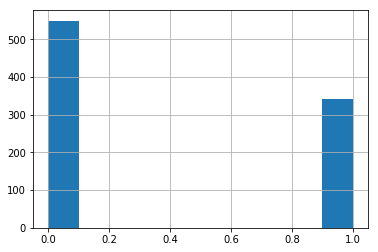

In [3]:
# First, let's take a look at the more detailed statistics of the dataframe. Our key points
# are the number of null values in each column at this point, as well as understanding
# overall information on survivors.

print(titanic_df.info(),
      titanic_df.groupby("Survived").count()['PassengerId'])

# View distribution of Survived column
titanic_df['Survived'].hist()

### Data Cleaning and Imputation

In [4]:
# There are 2 rows with the Embarked data missing. We'll intervene at this stage and remove
# those 2 outliers from the analysis

titanic_df = titanic_df.loc[~titanic_df['Embarked'].isnull(), :]

print(titanic_df.info(),
     titanic_df['Embarked'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


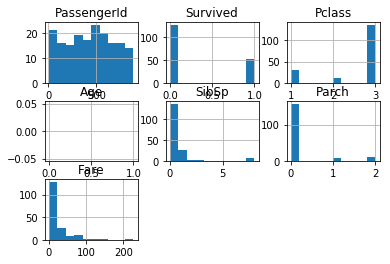

count    184.000000
mean      38.105543
std       14.778904
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64
37.0
count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64
29.0
count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64
24.0


In [5]:
# The next problem feature is age, which has 179 missing values. Let's explore the details 
# of the age feature.

print(titanic_df['Age'].describe())

# Let's review the characteristics of those who are missing age
titanic_df[titanic_df['Age'].isnull()].hist()
plt.show()

# And let's consider the statistics on age based on Pclass feature
for cl in [1, 2, 3]:
    print(titanic_df[~(titanic_df['Age'].isnull()) & (titanic_df['Pclass'] == cl)]['Age'].describe())
    print(titanic_df[~(titanic_df['Age'].isnull()) & (titanic_df['Pclass'] == cl)]['Age'].median())


In [6]:
# Given that the overall survivor ratio for these null values is similar to the general survivor
# ratio, we will include the null values and imputate a filler value into age. However, since there
# may be a reason the data was null, we will first create a binary feature for AgeNull.

# First, new binary feature for age nulls
titanic_df['AgeNull'] = titanic_df['Age'].isnull().astype("category").cat.codes

# Second, impute the mean age for each class of passenger

titanic_df['AgeImputation'] = titanic_df['Age']
for cl in [1, 2, 3]:
    titanic_df.loc[(titanic_df['AgeImputation'].isnull()) & (titanic_df['Pclass'] == cl), 'AgeImputation'] = \
        titanic_df.loc[~(titanic_df['Age'].isnull()) & (titanic_df['Pclass'] == cl), 'Age'].mean()

count         202
unique        146
top       B96 B98
freq            4
Name: Cabin, dtype: object
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' '

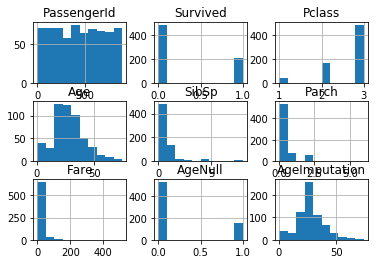

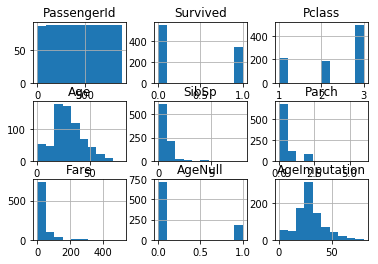



Data on Cabin series A


       PassengerId   Survived  Pclass        Age      SibSp      Parch  \
count    15.000000  15.000000    15.0  12.000000  15.000000  15.000000   
mean    439.600000   0.466667     1.0  44.833333   0.133333   0.133333   
std     262.044653   0.516398     0.0  20.171237   0.351866   0.516398   
min      24.000000   0.000000     1.0   4.000000   0.000000   0.000000   
25%     198.000000   0.000000     1.0  34.750000   0.000000   0.000000   
50%     476.000000   0.000000     1.0  44.000000   0.000000   0.000000   
75%     615.500000   1.000000     1.0  56.000000   0.000000   0.000000   
max     868.000000   1.000000     1.0  80.000000   1.000000   2.000000   

            Fare    AgeNull  AgeImputation  
count  15.000000  15.000000      15.000000  
mean   39.623887   0.200000      43.487775  
std    17.975333   0.414039      18.095576  
min     0.000000   0.000000       4.000000  
25%    30.847900   0.000000      37.052772  
50%    35.500000   0.000000      39.

In [7]:
# The last clear problem feature is Cabin, which has more nulls than values
# Let's review the statistics and distribution for Cabin feature based on null

print(titanic_df['Cabin'].describe())

print(titanic_df['Cabin'].unique())

# Let's review the characteristics of those who are missing age
titanic_df[titanic_df['Cabin'].isnull()].hist()
plt.show()

titanic_df.hist()
plt.show()

# And let's consider the statistics on age based on Pclass feature
for cab in ["A", "B", "C", "D", "E", "F"]:
    print(f"\n\nData on Cabin series {cab}\n\n")
    print(titanic_df[~(titanic_df['Cabin'].isnull()) & (titanic_df['Cabin'].astype(str).str.contains(cab))].describe())

### Feature Engineering

In [8]:
# From that preliminary analysis, there appears to be significant differences in the characteristics
# of the passengers based on cabin series code. To ensure a comprehensive analysis, let's build
# a feature for each possible cabin code

for cab in ["A", "B", "C", "D", "E", "F", "G"]:
    titanic_df[f'CabinCode_{cab}'] = titanic_df['Cabin'].apply(lambda cabin: 1 if cab in str(cabin) else 0)
    
# We can also create a feature to capture those cabin codes that were null
titanic_df['CabinNull'] = titanic_df['Cabin'].isnull().astype("category").cat.codes

In [9]:
# Let's start encoding this data into meaningful integers to help with our correlation analysis
# We'll begin with low-hanging fruit, the features that are easily encoded into binary results

# Our first new feature is simply pulling the Sex feature into binary codes, called GenderCode
titanic_df['GenderCode'] = titanic_df['Sex'].astype("category").cat.codes

# Next we can begin bucketing some features into binary features that will help with identifying
# certain categories of passengers

# We'll begin with the Embarked feature, bucketing a new binary feature for each unique value and
# one for null values.
for letter in ['S', 'Q', 'C']:
    titanic_df[f'Embarked_{letter}'] = titanic_df['Embarked'].apply(lambda embark: 1 if embark == letter else 0)

# We can do the same thing for the different classes of passengers
for _pclass in titanic_df['Pclass'].unique():
    titanic_df[f"Pclass_{_pclass}"] = titanic_df['Pclass'].apply(lambda x: 1 if x == _pclass else 0)

In [10]:
# Next, let's begin with some binary bucket features based on thresholds of other columns

# The first feature we'll binary bucket is Age. We'll create two new features that capture whether
# the passenger was older than average, or younger than the bottom quartile of age distribution

titanic_df['AgeAboveAvg'] = titanic_df['AgeImputation'].apply(lambda age: 1 if age >= titanic_df['AgeImputation'].mean() else 0)

titanic_df['AgeBelowQuartile'] = titanic_df['AgeImputation'].apply(lambda age: 1 if age <= titanic_df['AgeImputation'].quantile(0.25) else 0)

print(f"The mean age of passengers was {titanic_df['AgeImputation'].mean()}")
print(f"The median age of passengers was {titanic_df['AgeImputation'].median()}")
print(f"The bottom quartile of passenger ages was {titanic_df['AgeImputation'].quantile(0.25)}")
      
# The second feature we'll binary bucket is Fare. We'll create three new features that capture
# if the passenger paid over the average or median fare, or paid less than the bottom quartile of fares
      

titanic_df['FareAboveAvg'] = titanic_df['Fare'].apply(lambda fare: 1 if fare >= titanic_df['Fare'].mean() else 0)
titanic_df['FareAboveMedian'] = titanic_df['Fare'].apply(lambda fare: 1 if fare >= titanic_df['Fare'].median() else 0)
titanic_df['FareBelowQuartile'] = titanic_df['Fare'].apply(lambda fare: 1 if fare <= titanic_df['Fare'].quantile(0.25) else 0)

print(f"The mean fare of passengers was {titanic_df['Fare'].mean()}")
print(f"The median fare of passengers was {titanic_df['Fare'].median()}")
print(f"The mean fare of passengers was {titanic_df['Fare'].quantile(0.25)}")

The mean age of passengers was 29.24197358455993
The median age of passengers was 26.0
The bottom quartile of passenger ages was 22.0
The mean fare of passengers was 32.09668087739029
The median fare of passengers was 14.4542
The mean fare of passengers was 7.8958


In [11]:
# Finally, let's create some new features that describe our other features in a (hopefully)
# meaningful manner. We'll create three new features here, 2 based on passenger names and
# one based on their ticket.


# First, let's break down the salutation contained within their name. A cursory glance at the dataframe
# showed many had the salutations Mr, Mrs and Miss. Let's create separate binary buckets for each.
# Intuition and some domain knowledge suggest that women's names will be treated different than men, 
# but a breakdown between Miss. and Mrs. provides more granular details.
for salutation in ["Mr.", "Miss.", "Mrs."]:
    titanic_df[salutation] = titanic_df['Name'].apply(lambda name: 1 if salutation in str(name) else 0)

# Then, let's see if the name's overall length provides any type of correlation to survival. 
titanic_df['NameLength'] = titanic_df['Name'].apply(lambda name: len(str(name)))

# Finally, a glance at the ticket feature reveals some tickets contain letters. Let's create a new
# feature to capture those passengers who contain a letter in their ticket number.
titanic_df['LetterTicket'] = titanic_df['Ticket'].apply(lambda ticket: 0 if str(ticket).isdigit() else 1)

In [12]:
# With the features now created, let's check on what the result of this new dataframe looks like.

print(titanic_df.columns)

print(titanic_df.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeNull',
       'AgeImputation', 'CabinCode_A', 'CabinCode_B', 'CabinCode_C',
       'CabinCode_D', 'CabinCode_E', 'CabinCode_F', 'CabinCode_G', 'CabinNull',
       'GenderCode', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Pclass_3',
       'Pclass_1', 'Pclass_2', 'AgeAboveAvg', 'AgeBelowQuartile',
       'FareAboveAvg', 'FareAboveMedian', 'FareBelowQuartile', 'Mr.', 'Miss.',
       'Mrs.', 'NameLength', 'LetterTicket'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        889 non-null    int64  
 1   Survived           889 non-null    int64  
 2   Pclass             889 non-null    int64  
 3   Name               889 non-null    object 
 4   Sex                889 n

### Data Analysis and Survived Correlations

In [13]:
# With 38 columns now to work with, we can begin our work analyzing the correlation between
# our passenger features and the survival rate.

# First let's trim the dataset from feature columns that won't provide insights.

titanic_df.drop(['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'Ticket',
 'Cabin',
 'Embarked'], axis=1, inplace=True)

# Let's see the output of the titanic_df correlation for all features against Survival.
# Since titanic_df.corr() method returns a dataframe itself, we can column call into it.
survival_corrs = titanic_df.corr()['Survived']
survival_corrs.sort_values(ascending=False)

Survived             1.000000
Mrs.                 0.337892
NameLength           0.332582
Miss.                0.326352
Pclass_1             0.282368
FareAboveMedian      0.265168
Fare                 0.255290
FareAboveAvg         0.240529
Embarked_C           0.169966
CabinCode_B          0.166714
CabinCode_E          0.151555
CabinCode_D          0.151555
CabinCode_C          0.115629
Pclass_2             0.095002
Parch                0.083151
CabinCode_F          0.058388
AgeBelowQuartile     0.050950
AgeAboveAvg          0.041690
CabinCode_A          0.022701
Embarked_Q           0.004536
LetterTicket         0.000190
CabinCode_G         -0.017733
SibSp               -0.034040
AgeImputation       -0.055347
AgeNull             -0.090967
Embarked_S          -0.151777
FareBelowQuartile   -0.220444
CabinNull           -0.313435
Pclass_3            -0.320171
GenderCode          -0.541585
Mr.                 -0.547689
Name: Survived, dtype: float64

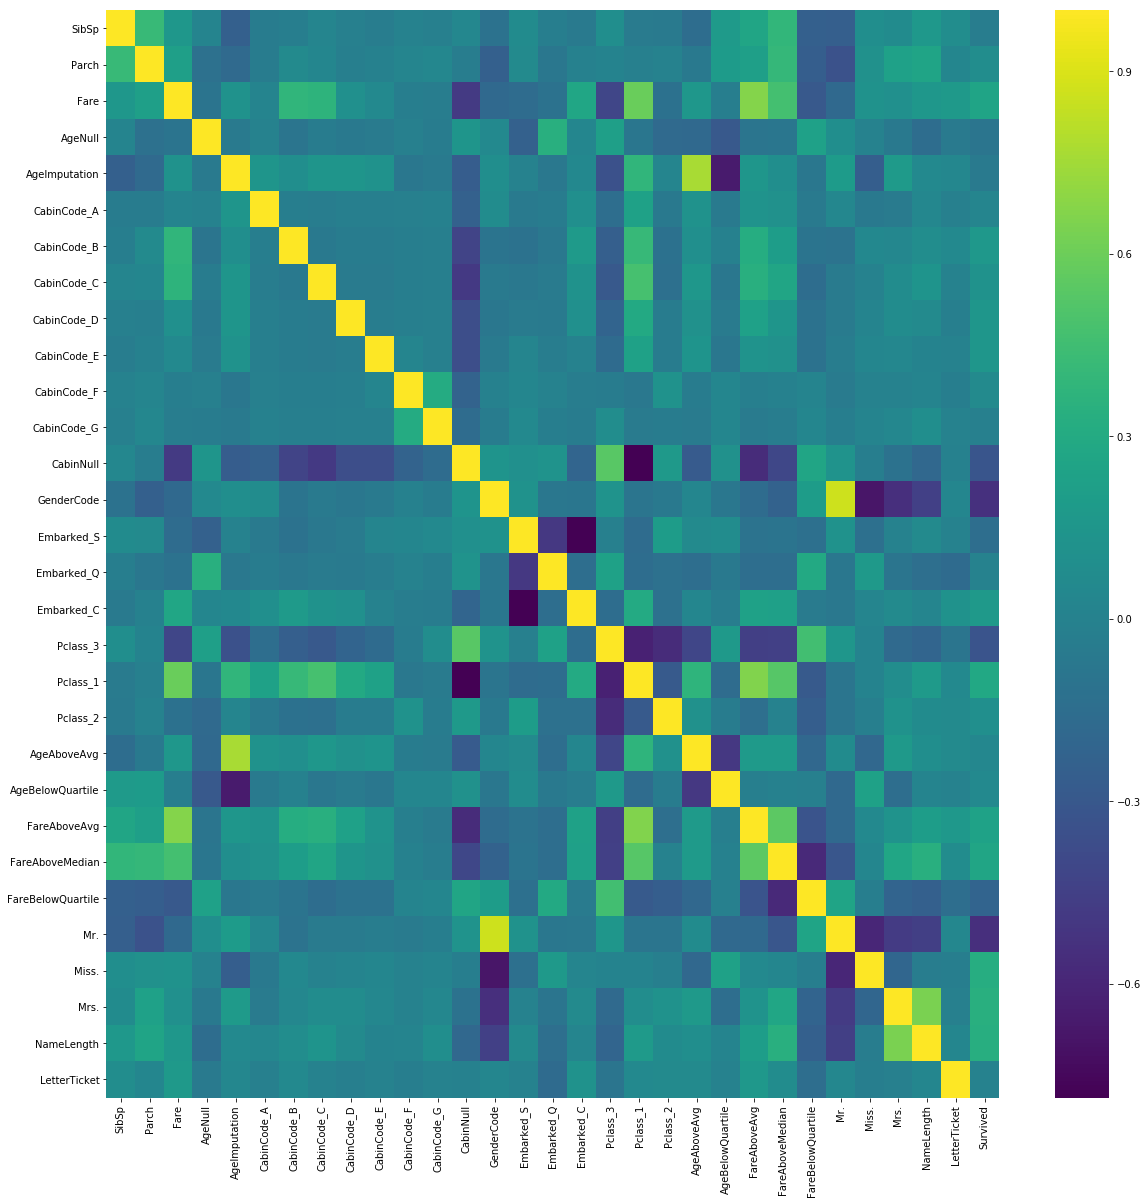

In [14]:
# Visualizing the correlations between variables. Of key importance is the Survived column of the
# full correlation table. Visible at the far right of the heatmap visualization below.

full_corr_table = titanic_df.corr()

# Set a larger figure
plt.figure(figsize=(20,20))

# Using a nice seaborn visualization for the matrix
sns.heatmap(full_corr_table.loc['SibSp':, 'SibSp':].join(survival_corrs['SibSp':]),
           cmap='viridis')

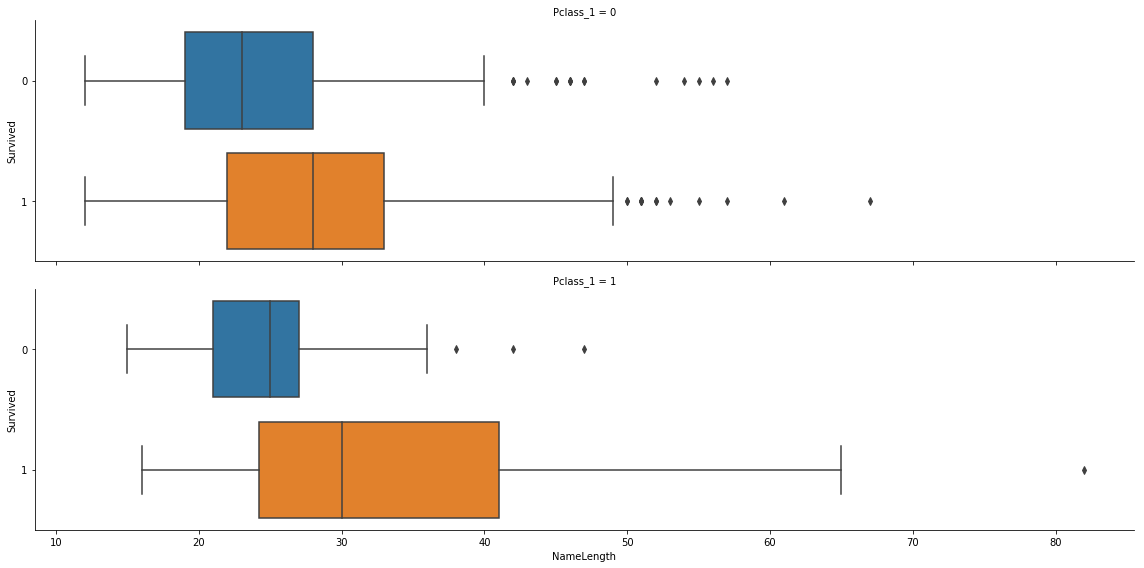

In [15]:
# Exploring the data a little more indepth with some more seaborn visualizations

# Starting with a visualization explaining the correlation between Survived, NameLength and passenger class

sns.catplot(data=titanic_df, x='NameLength', y='Survived', row='Pclass_1', kind='box',
           orient='h', height=4, aspect=4)

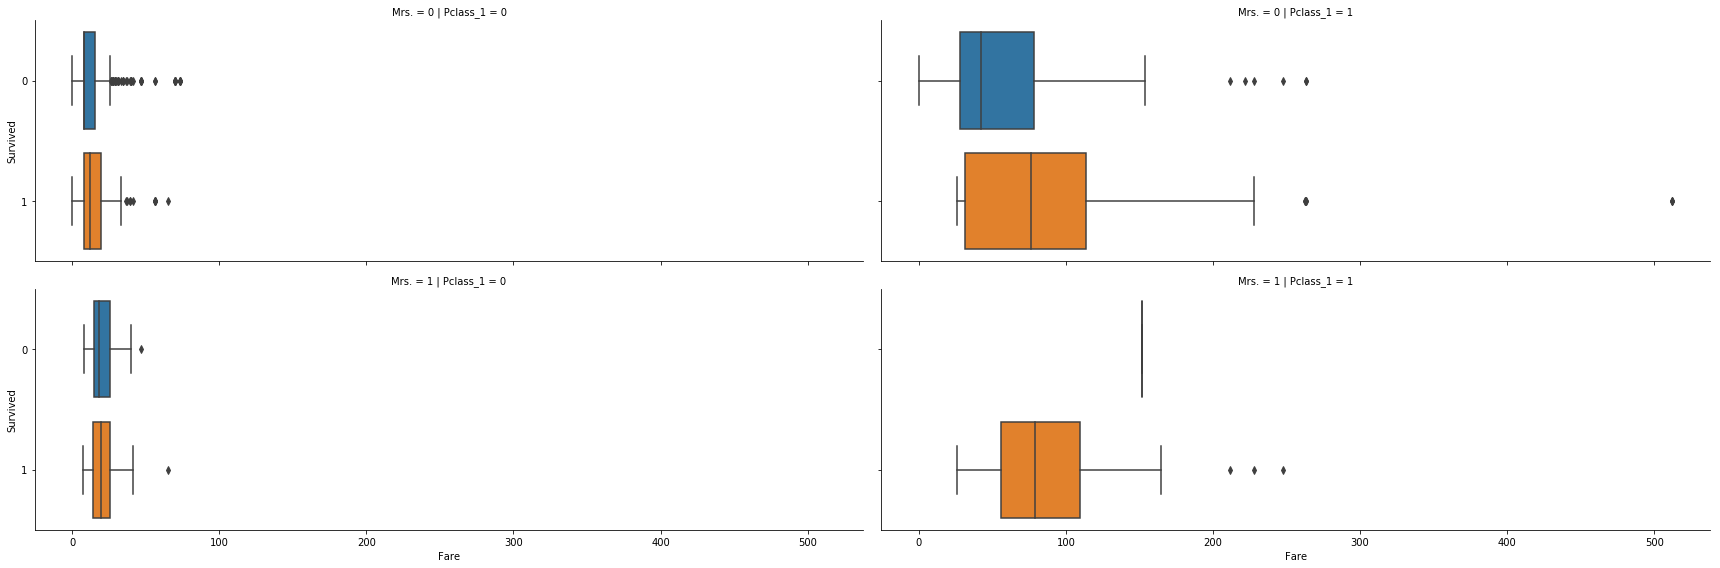

In [16]:
# A more indepth categorical visualization for survived based on fare, Mrs. salutation and class

sns.catplot(data=titanic_df, x='Fare', y='Survived', row='Mrs.', kind='box',
           col='Pclass_1', orient='h', height=4, aspect=3)

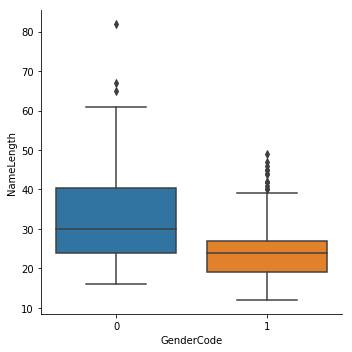

In [17]:
# Visualizing the correlation between GenderCode and NameLength

sns.catplot(data=titanic_df, x='GenderCode', y='NameLength', kind='box')

In [18]:
# Exploring the dataset with the categories most correlated with survival 

titanic_df.loc[
    (titanic_df['Mrs.'] == 1) &\
    (titanic_df['Pclass_1'] == 1) &\
    (titanic_df['FareAboveMedian'] == 1),
    ['Survived']
]

,Survived
1,1
3,1
31,1
52,1
151,1
166,1
194,1
230,1
256,1
268,1


In [19]:
# output of features used

titanic_df.columns

Index(['Survived', 'SibSp', 'Parch', 'Fare', 'AgeNull', 'AgeImputation',
       'CabinCode_A', 'CabinCode_B', 'CabinCode_C', 'CabinCode_D',
       'CabinCode_E', 'CabinCode_F', 'CabinCode_G', 'CabinNull', 'GenderCode',
       'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'AgeAboveAvg', 'AgeBelowQuartile', 'FareAboveAvg',
       'FareAboveMedian', 'FareBelowQuartile', 'Mr.', 'Miss.', 'Mrs.',
       'NameLength', 'LetterTicket'],
      dtype='object')